#  Projeto Diamonds

## Preparando código

In [2]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import LinearRegression

In [3]:
hist_dia = pd.read_csv('data/diamonds.csv')
rick_dia = pd.read_csv('data/rick_diamonds.csv')

In [4]:
hist_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [3]:
hist_dia.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


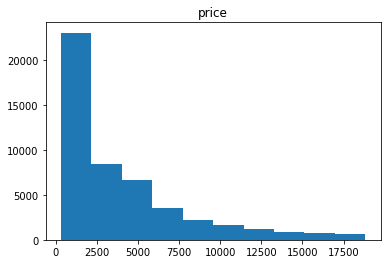

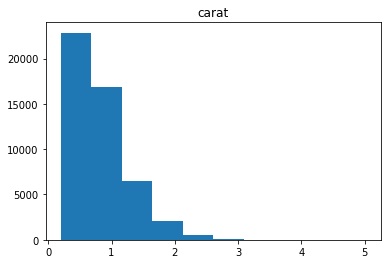

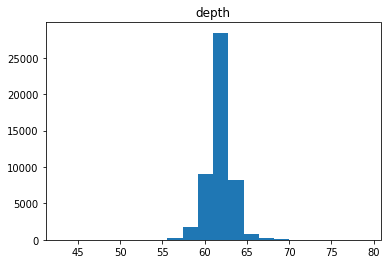

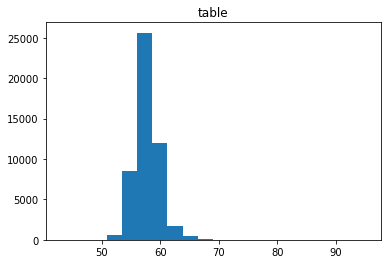

In [4]:
plt.hist(hist_dia['price'])
plt.title('price')
plt.show()

plt.hist(hist_dia['carat'], bins=10)
plt.title('carat')
plt.show()

plt.hist(hist_dia['depth'], bins=20)
plt.title('depth')
plt.show()

plt.hist(hist_dia['table'], bins=20)
plt.title('table')
plt.show()

##  Primeira Baseline - Média

In [5]:
# Avaliando a média de preços
hist_dia['price'].mean()

3934.409644462607

In [6]:
def calcula_erro_media(df):
    ''' Esta funcao recebe um dataframe com uma coluna 'price_predicted' e calcula
        o RMSE em relacao a media de preço de diamantes
    '''
    
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    
    y_mean = [hist_dia['price'].mean() for i in range(len(df))]
    
    rmse_media = mean_squared_error(y_mean, df['price_predicted'])
    r2_media = r2_score(y_mean, df['price_predicted'])
    
    return rmse_media, r2_media

##  Desenvolvimento

###  Primeira Regressão Linear - Sem tratamento

Erro: 1562.4289387419713

In [7]:
X = hist_dia[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = hist_dia['price']

In [8]:
model_1 = LinearRegression()
model_1.fit(X,y)

LinearRegression()

In [9]:
rick_dia['price_predicted'] = model_1.predict(rick_dia[['carat', 'depth', 'table', 'x', 'y', 'z']])

In [ ]:
calcula_erro_media(rick_dia)

###  Tratamento 1: escolhendo colunas numéricas

Erro: 1586.858254661364

In [11]:
hist_dia.corr()['price']

carat    0.922186
depth   -0.012037
table    0.127832
price    1.000000
x        0.885019
y        0.864059
z        0.860247
Name: price, dtype: float64

In [12]:
X = hist_dia[['carat', 'x', 'y', 'z']]
y = hist_dia['price']

In [13]:
model_2 = LinearRegression()
model_2.fit(X,y)

LinearRegression()

In [14]:
rick_dia['price_predicted'] = model_2.predict(rick_dia[['carat', 'x', 'y', 'z']])

In [ ]:
calcula_erro_media(rick_dia)

###  Tratando coluna 'carat'

**Esta frente pode ser abandonada !!!**

Erro: 1587.6633357235637

In [ ]:
plt.scatter(x='carat', y='price', data=hist_dia)
plt.show()

In [16]:
hist_dia.loc[hist_dia['carat']>3.2, 'carat'] = hist_dia['carat'].median()

In [17]:
X = hist_dia[['carat', 'x', 'y', 'z']]
y = hist_dia['price']

In [18]:
model_3 = LinearRegression()
model_3.fit(X,y)

LinearRegression()

In [19]:
rick_dia['price_predicted'] = model_3.predict(rick_dia[['carat', 'x', 'y', 'z']])

In [ ]:
calcula_erro_media(rick_dia)

###  Tratando coluna 'clarity'

Erro: 1398.109285038074

In [ ]:
hist_dia['clarity'].value_counts()

In [21]:
# Transformando strings da coluna 'clarity' em inteiros discretos
clarity_order = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

hist_dia['clar'] = hist_dia['clarity'].apply(lambda x: clarity_order[x])
rick_dia['clar'] = rick_dia['clarity'].apply(lambda x: clarity_order[x])

In [22]:
X = hist_dia[['carat', 'clar', 'x', 'y', 'z']]
y = hist_dia['price']

In [23]:
model_4 = LinearRegression()
model_4.fit(X,y)

LinearRegression()

In [24]:
rick_dia['price_predicted'] = model_4.predict(rick_dia[['carat', 'clar', 'x', 'y', 'z']])

In [25]:
calcula_erro_media(rick_dia)

(14248116.273608115, 0.0)

###  Tratando coluna 'color'

Erro: 1300.193480874001

In [27]:
hist_dia['color'].value_counts()

G    10287
E     8869
F     8653
H     7542
D     6160
I     4889
J     2540
Name: color, dtype: int64

In [28]:
# Transformando strings da coluna 'clarity' em inteiros discretos
color_order = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}

hist_dia['color_class'] = hist_dia['color'].apply(lambda x: color_order[x])
rick_dia['color_class'] = rick_dia['color'].apply(lambda x: color_order[x])

In [31]:
X = hist_dia[['carat', 'clar', 'color_class', 'x', 'y', 'z']]
y = hist_dia['price']

In [32]:
model_5 = LinearRegression()
model_5.fit(X,y)

LinearRegression()

In [33]:
rick_dia['price_predicted'] = model_5.predict(rick_dia[['carat', 'clar', 'color_class', 'x', 'y', 'z']])

In [34]:
calcula_erro_media(rick_dia)

(14542645.400054568, 0.0)

###  Tratando coluna 'cut'

Erro: 1288.2588485040092

In [26]:
hist_dia['cut'].value_counts()

Ideal        19608
Premium      12507
Very Good    10922
Good          4443
Fair          1460
Name: cut, dtype: int64

In [36]:
# Transformando strings da coluna 'clarity' em inteiros discretos
cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

hist_dia['cut_class'] = hist_dia['cut'].apply(lambda x: cut_order[x])
rick_dia['cut_class'] = rick_dia['cut'].apply(lambda x: cut_order[x])

In [37]:
X = hist_dia[['carat', 'clar','color_class', 'cut_class', 'x', 'y', 'z']]
y = hist_dia['price']

In [38]:
model_6 = LinearRegression()
model_6.fit(X,y)

LinearRegression()

In [39]:
rick_dia['price_predicted'] = model_6.predict(rick_dia[['carat', 'clar', 'color_class', 'cut_class', 'x', 'y', 'z']])

In [40]:
calcula_erro_media(rick_dia)

(14590627.639565002, 0.0)

###  Tratando colunas y e z

Erro: 1289.9603309540764

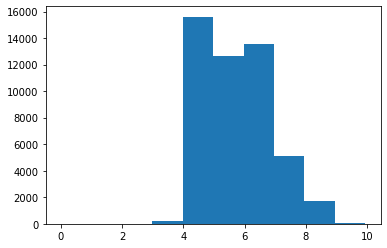

In [54]:
plt.hist(hist_dia['y']);

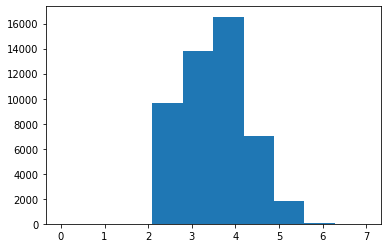

In [55]:
plt.hist(hist_dia['z']);

In [46]:
hist_dia.loc[hist_dia['y']>10].shape

(5, 13)

In [47]:
hist_dia.loc[hist_dia['z']>7].shape

(2, 13)

In [48]:
hist_dia.loc[hist_dia['y']>10, 'y'] = hist_dia['y'].median()
hist_dia.loc[hist_dia['z']>7, 'z'] = hist_dia['z'].median()

In [61]:
X = hist_dia[['carat', 'clar','color_class', 'cut_class', 'x', 'y', 'z']]
y = hist_dia['price']

In [62]:
model_7 = LinearRegression()
model_7.fit(X,y)

LinearRegression()

In [64]:
rick_dia['price_predicted'] = model_7.predict(rick_dia[['carat', 'clar', 'color_class', 'cut_class', 'x', 'y', 'z']])

In [65]:
calcula_erro_media(rick_dia)

(14595853.034192368, 0.0)

##  Salvando .csv

In [60]:
rick_dia[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price_predicted']].to_csv('data/rick_dia_resposta.csv', index=False)